In [2]:
import numpy as np
import cvxpy as cp
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

n = 10000    # number of bidders
m = 10       # type of resources

A = pd.read_csv("A_3.csv")
pi = pd.read_csv("pi_dependent.csv")

A = np.array(A)
pi = np.array(pi)
pi = pi.T
b = np.array([1000 for _ in range(m)]) 


OffLine

In [4]:
x = cp.Variable(n)
ee = np.ones(n)
objective = cp.Maximize(pi@x)
constraints = [A@x <= b, x >= 0, x <= ee]
prob = cp.Problem(objective, constraints)

prob.solve()
x.value


print(x.value)
print(prob.value)
opv1 = prob.value

x = x.value
x = np.where(x >= 0.5, 1, 0)

[ 1.17969537e-11 -5.96513473e-12 -4.24879066e-11 ...  1.00000000e+00
  1.00000000e+00  1.00000000e+00]
42255092.735269636


In [5]:
Anow = A
Anow = Anow.T
# print(Anow.shape)
piNow = (pi.T)
piNow = np.reshape(piNow, (n,))
bNow = b
bNow = bNow.T

temp = m+n
y = cp.Variable(temp)
e = np.ones(n)
objective = cp.Minimize(bNow@(y[:m]) + e@(y[m:]))
constraints = [(Anow@(y[:m])+ (y[m:]))>= piNow, y >= 0]
prob = cp.Problem(objective, constraints)

prob.solve()
P = y[:m].value
p_truth = P
P

array([3254.36583882, 2499.16322271, 2921.66761755, 2894.17251434,
       2981.37443506, 2955.19719493, 3492.75717658, 3141.32743696,
       3019.70152472, 3357.56824267])

In [6]:
def one_time_learning(k):
    Anow = A[:, 0:k]
    Anow = Anow.T
    piNow = (pi.T)[0:k]
    piNow = np.reshape(piNow, (k,))
    bNow = b*(float(k/n))
    bNow = bNow.T

    temp = m+(k)
    y = cp.Variable(temp)
    e = np.ones(k)
    objective = cp.Minimize(bNow@(y[:m]) + e@(y[m:]))
    constraints = [(Anow@(y[:m])+ (y[m:]))>= piNow, y >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    P = y[:m].value
    AT = A.T
    xp50 = []
    xk50 = []
    for i in range(n):
        cri = (AT[i].dot(P))
        if(pi[0][i] > cri):
            xp50.append(1)
        else:
            xp50.append(0)  # xt(p) 10000
        if i < k:
            xk50.append(0)  #50
    for t in range(k,n):
        test = 1
        for j in range(m):
            temp1 = A[j,t]*xp50[t]
            temp2 = b[j] - (A[j, :t]).dot(np.array(xk50))
            if temp1 > temp2:
                test = 0
                break
        if test == 1:
            xk50.append(xp50[t])
        else:
            xk50.append(0)
    return xk50, P

In [7]:
k = 50
l_decision, dual_price = one_time_learning(k)
opv2 = (pi.dot(l_decision))[0]
ratio = opv2/opv1
print("when k =", k)
print('optimal value', opv2)
print("competetive ratio is", ratio)
print("dual price is", dual_price)

when k = 50
optimal value 4701133.0381201
competetive ratio is 0.11125601043104898
dual price is [ 3.69029026e+01  3.91151384e+01  1.89977243e+01  1.27289141e+00
  4.72187572e+01  5.01720980e-08 -1.91475822e-11  2.74599370e+01
  3.66820264e+01  1.39063729e+01]


In [8]:
k = 100
l_decision, dual_price = one_time_learning(k)
opv2 = (pi.dot(l_decision))[0]
ratio = opv2/opv1
print("when k =", k)
print("competetive ratio is", ratio)
print("dual price is", dual_price)

when k = 100
competetive ratio is 0.11794062782122776
dual price is [ 3.20287977e+01  3.64009913e+01 -2.90919991e-09  3.77715438e+01
  5.18412751e+00  8.81053432e+01  6.14306170e+01  6.53036848e+01
  2.73904781e+01  1.20064439e+01]


In [9]:
k = 200
l_decision, dual_price = one_time_learning(k)
opv2 = (pi.dot(l_decision))[0]
ratio = opv2/opv1
print("when k =", k)
print("competetive ratio is", ratio)
print("dual price is", dual_price)

when k = 200
competetive ratio is 0.12954732166548757
dual price is [ 29.98674191 133.653304   102.61912599 108.90369943  21.91915926
  45.88719649 116.49775007  27.75100899  57.79942752  57.16005245]


In [10]:
dic_ratio = {}
dic_price = {}
dua_price = []
l_norm = []
for k in range(50, 1050, 50):
    l_decision, dual_price = one_time_learning(k)
    opv2 = (pi.dot(l_decision))[0]
    ratio = opv2/opv1
    dic_ratio[k] = ratio
    dic_price[k] = dual_price
    dua_price.append(dual_price)
    print("when k = ", k)
    print("competetive ratio is", ratio)
    print("norm of difference of dual price", np.linalg.norm(dual_price-p_truth))
    l_norm.append(np.linalg.norm(dual_price-p_truth))

when k =  50
competetive ratio is 0.11125601043104898
norm of difference of dual price 9618.457703371476


KeyboardInterrupt: 

In [ ]:
# for i in dua_price:
#     dif = np.linalg.norm(i-p_truth)
#     l_norm.append(dif)

In [ ]:
# l_norm = pd.DataFrame(np.array(l_norm))
# l_norm.to_csv('l_norm.csv',index=False)

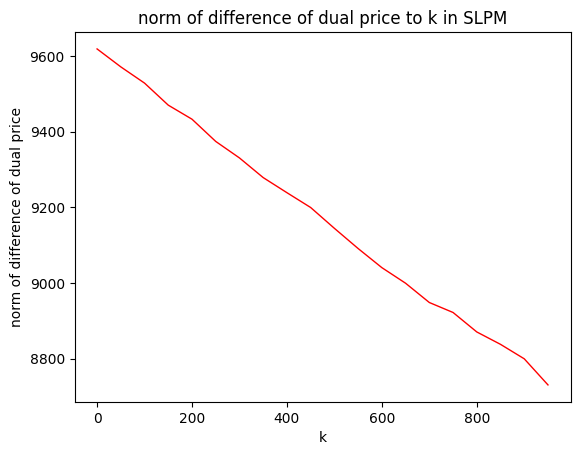

In [ ]:
x = [50*i for i in range(20)]
plt.plot(x, l_norm, color='red', linestyle='solid', linewidth=1, markersize=4)
plt.xlabel("k")
plt.ylabel("norm of difference of dual price")
plt.title("norm of difference of dual price to k in SLPM")
plt.savefig("Q1_different_k.jpg", dpi=400)
plt.show()
# plt.savefig("Q5_different_2.png")
# one time dual price(虚线)， ratio with(1-emsilon) 1 2
#

one time: 1. 定dual price(虚线)，两个dual分别（三条） 2. ratio 两条(with 1-epsilon)  橙蓝  
dynamic: 和one time（1-epsilon） revenue一起